In [3]:
import os
import matplotlib.pyplot as plt
from notebooks.visualization.activations_funcs import get_activation_dictionnary

import seaborn as sns

from notebooks.visualization.activations_funcs import get_all_connections
from paths import PROJECT_ROOT
plots_dir = os.path.join(PROJECT_ROOT, "plots")

NUM_PASSES = 3

sns.set_theme(style="whitegrid", font_scale=1.4)

# Set up the figure with Nature-compatible settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Arial', 'Helvetica', 'sans-serif']
plt.rcParams["font.size"] = 16
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

# Create plots directory if it doesn't exist
os.makedirs(plots_dir, exist_ok=True)

In [4]:
from utils.helpers import load_neuron_coordinates

neuron_position_data = load_neuron_coordinates()
connections_dict = get_all_connections()
activations_dict = get_activation_dictionnary(connections_dict, NUM_PASSES)

# Panel A

/home/eudald/Escriptori/doctorat/connectome/notebooks/visualization/activation_plots.py:329: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


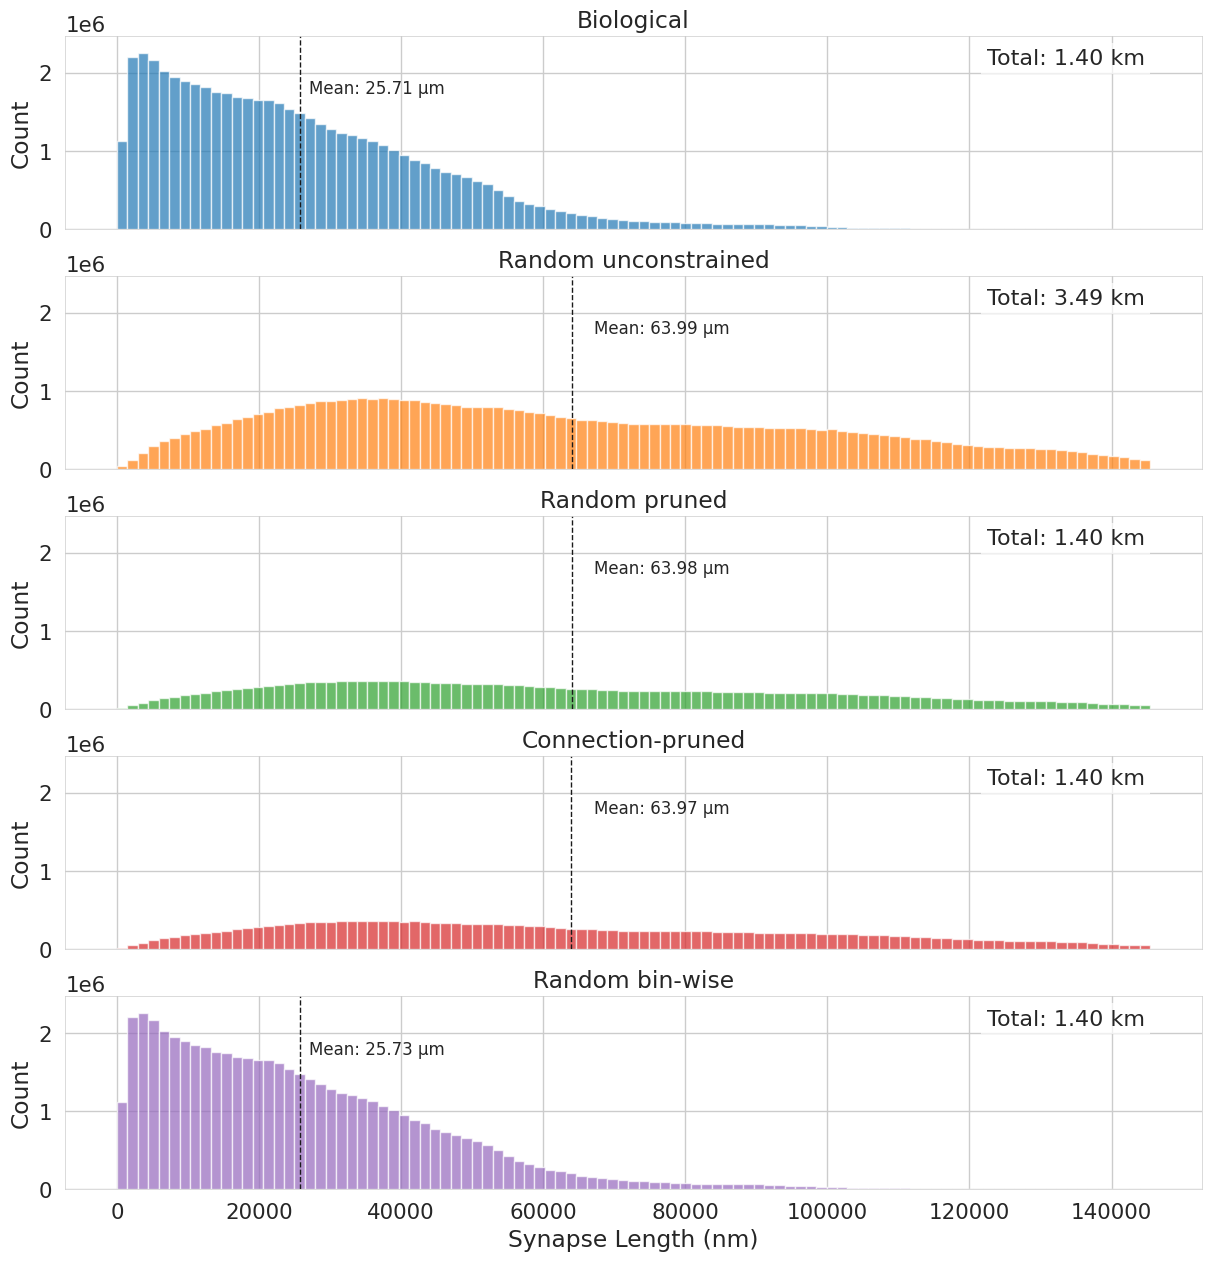

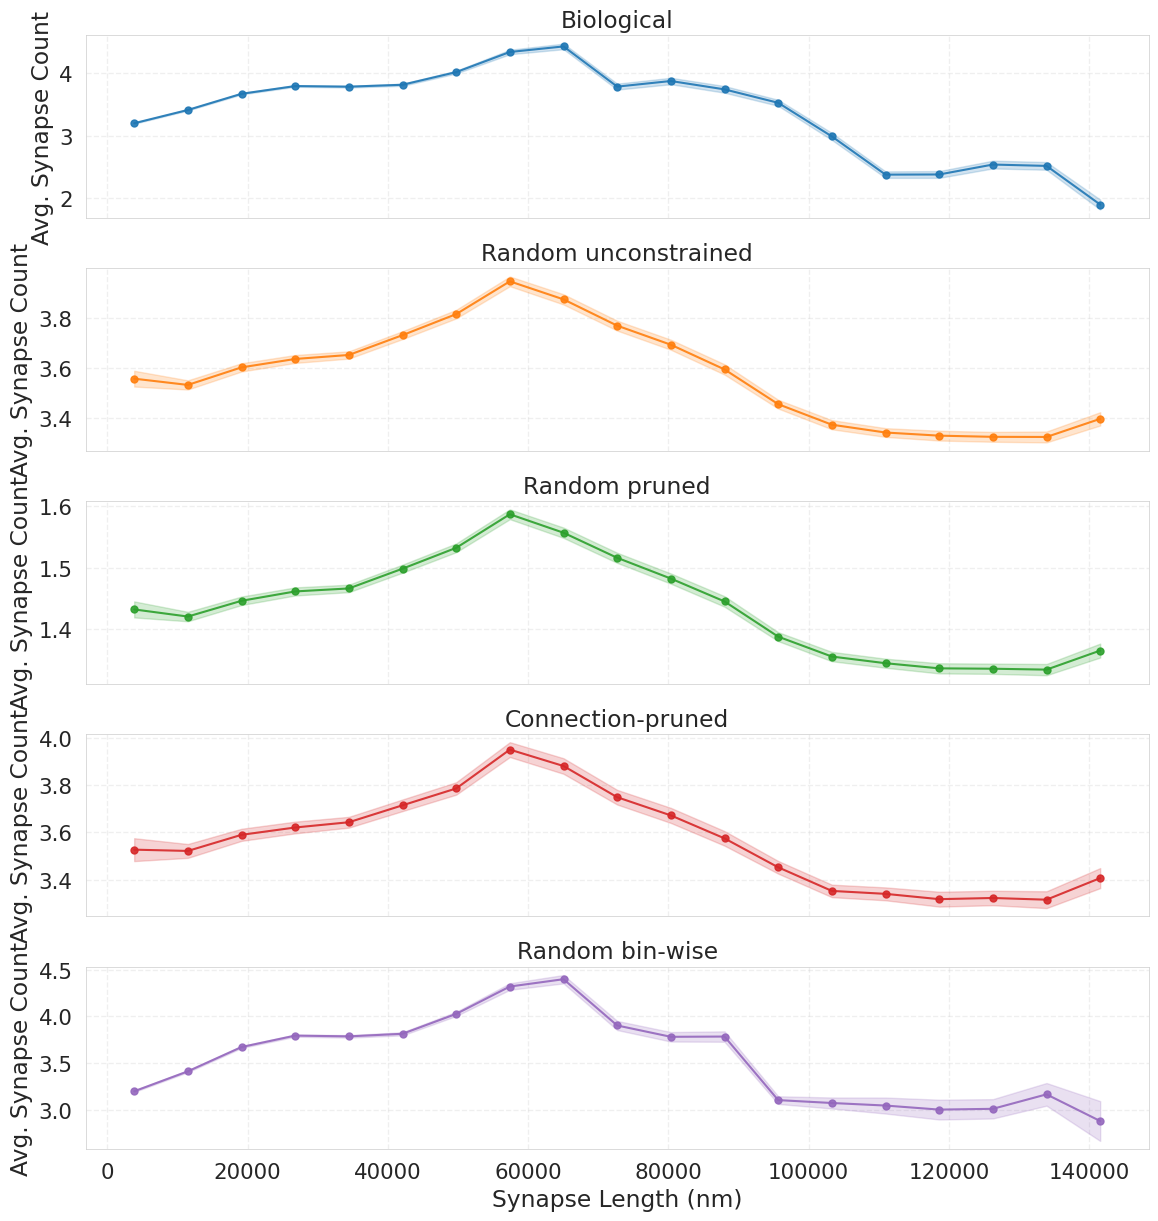

In [5]:
import importlib
from notebooks.visualization import activation_plots
importlib.reload(activation_plots)
from notebooks.visualization.activation_plots import plot_synapse_length_distributions

figa1, figa2 = plot_synapse_length_distributions(neuron_position_data, connections_dict, use_density=False, num_confidence_interval_se=2)

figa1.savefig(os.path.join(plots_dir, "synapse_length_distributions.png"),
            dpi=300, bbox_inches="tight", transparent=True)
figa1.savefig(os.path.join(plots_dir, "synapse_length_distributions.pdf"),
            bbox_inches="tight")

figa2.savefig(os.path.join(plots_dir, "synapse_count_per_length.png"),
            dpi=300, bbox_inches="tight", transparent=True)
figa2.savefig(os.path.join(plots_dir, "synapse_count_per_length.pdf"),
            bbox_inches="tight")


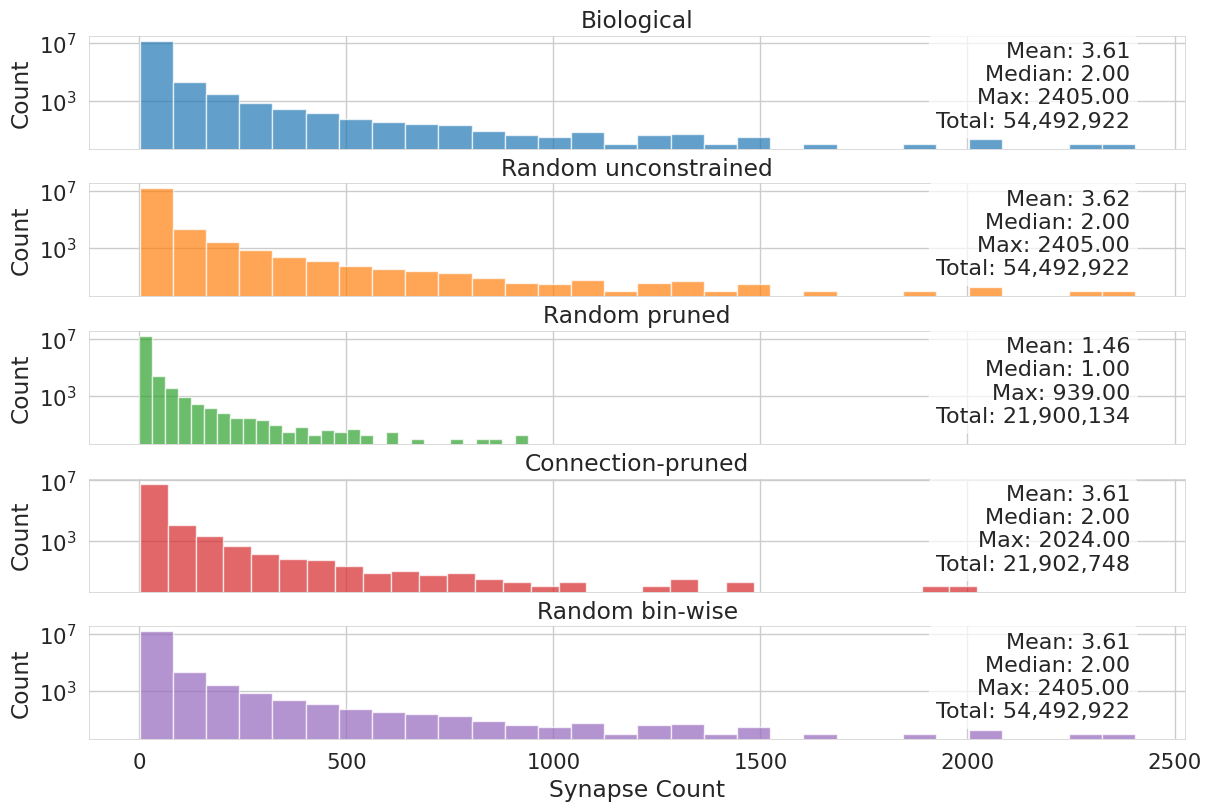

In [6]:
import importlib
from notebooks.visualization import activation_plots
importlib.reload(activation_plots)
from notebooks.visualization.activation_plots import plot_synapse_counts_histogram

fig = plot_synapse_counts_histogram(connections_dict, log_scale=True)

# Panel b

IndexError: list index out of range

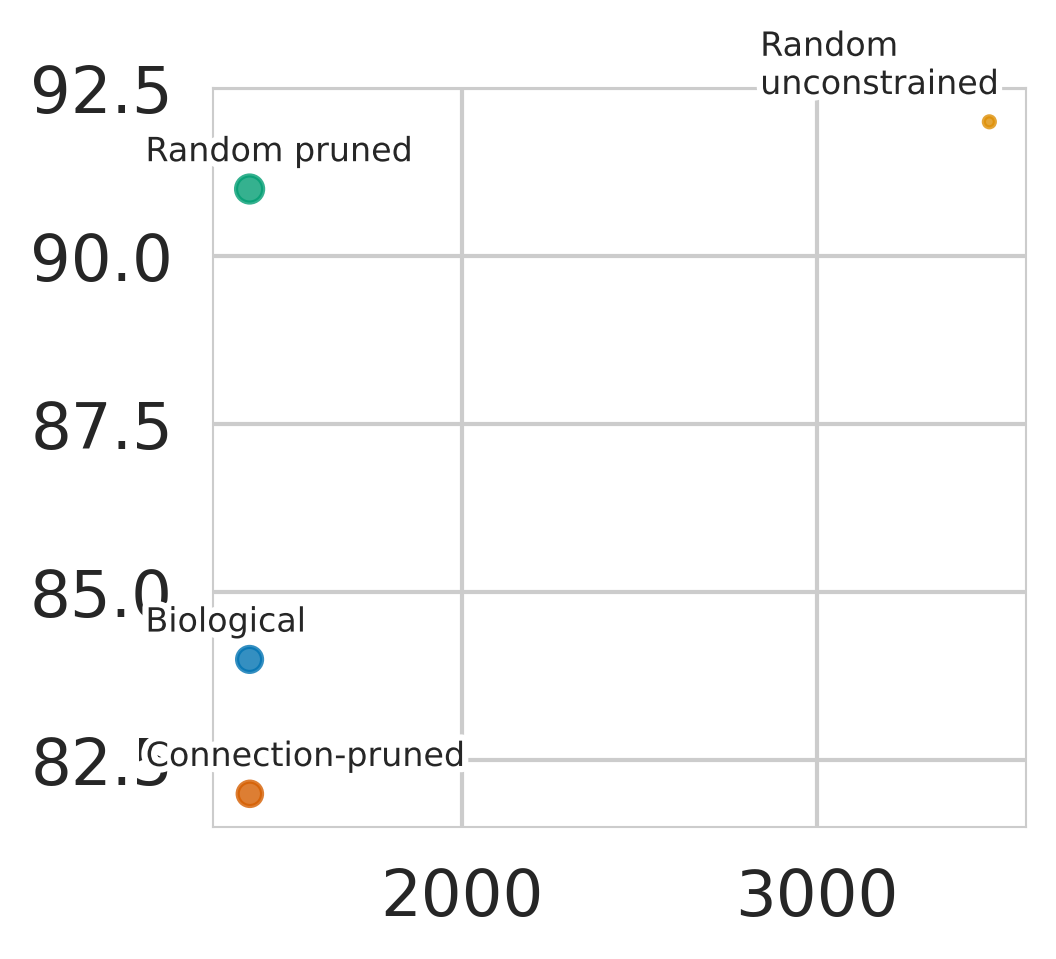

In [7]:
from notebooks.visualization.activation_plots import efficiency_comparison


figb = efficiency_comparison(neuron_position_data, connections_dict)
plt.savefig(os.path.join(plots_dir,"efficiency_comparison.png"), dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(os.path.join(plots_dir,"efficiency_comparison.pdf"), bbox_inches="tight") 
plt.show()

# Pancel c

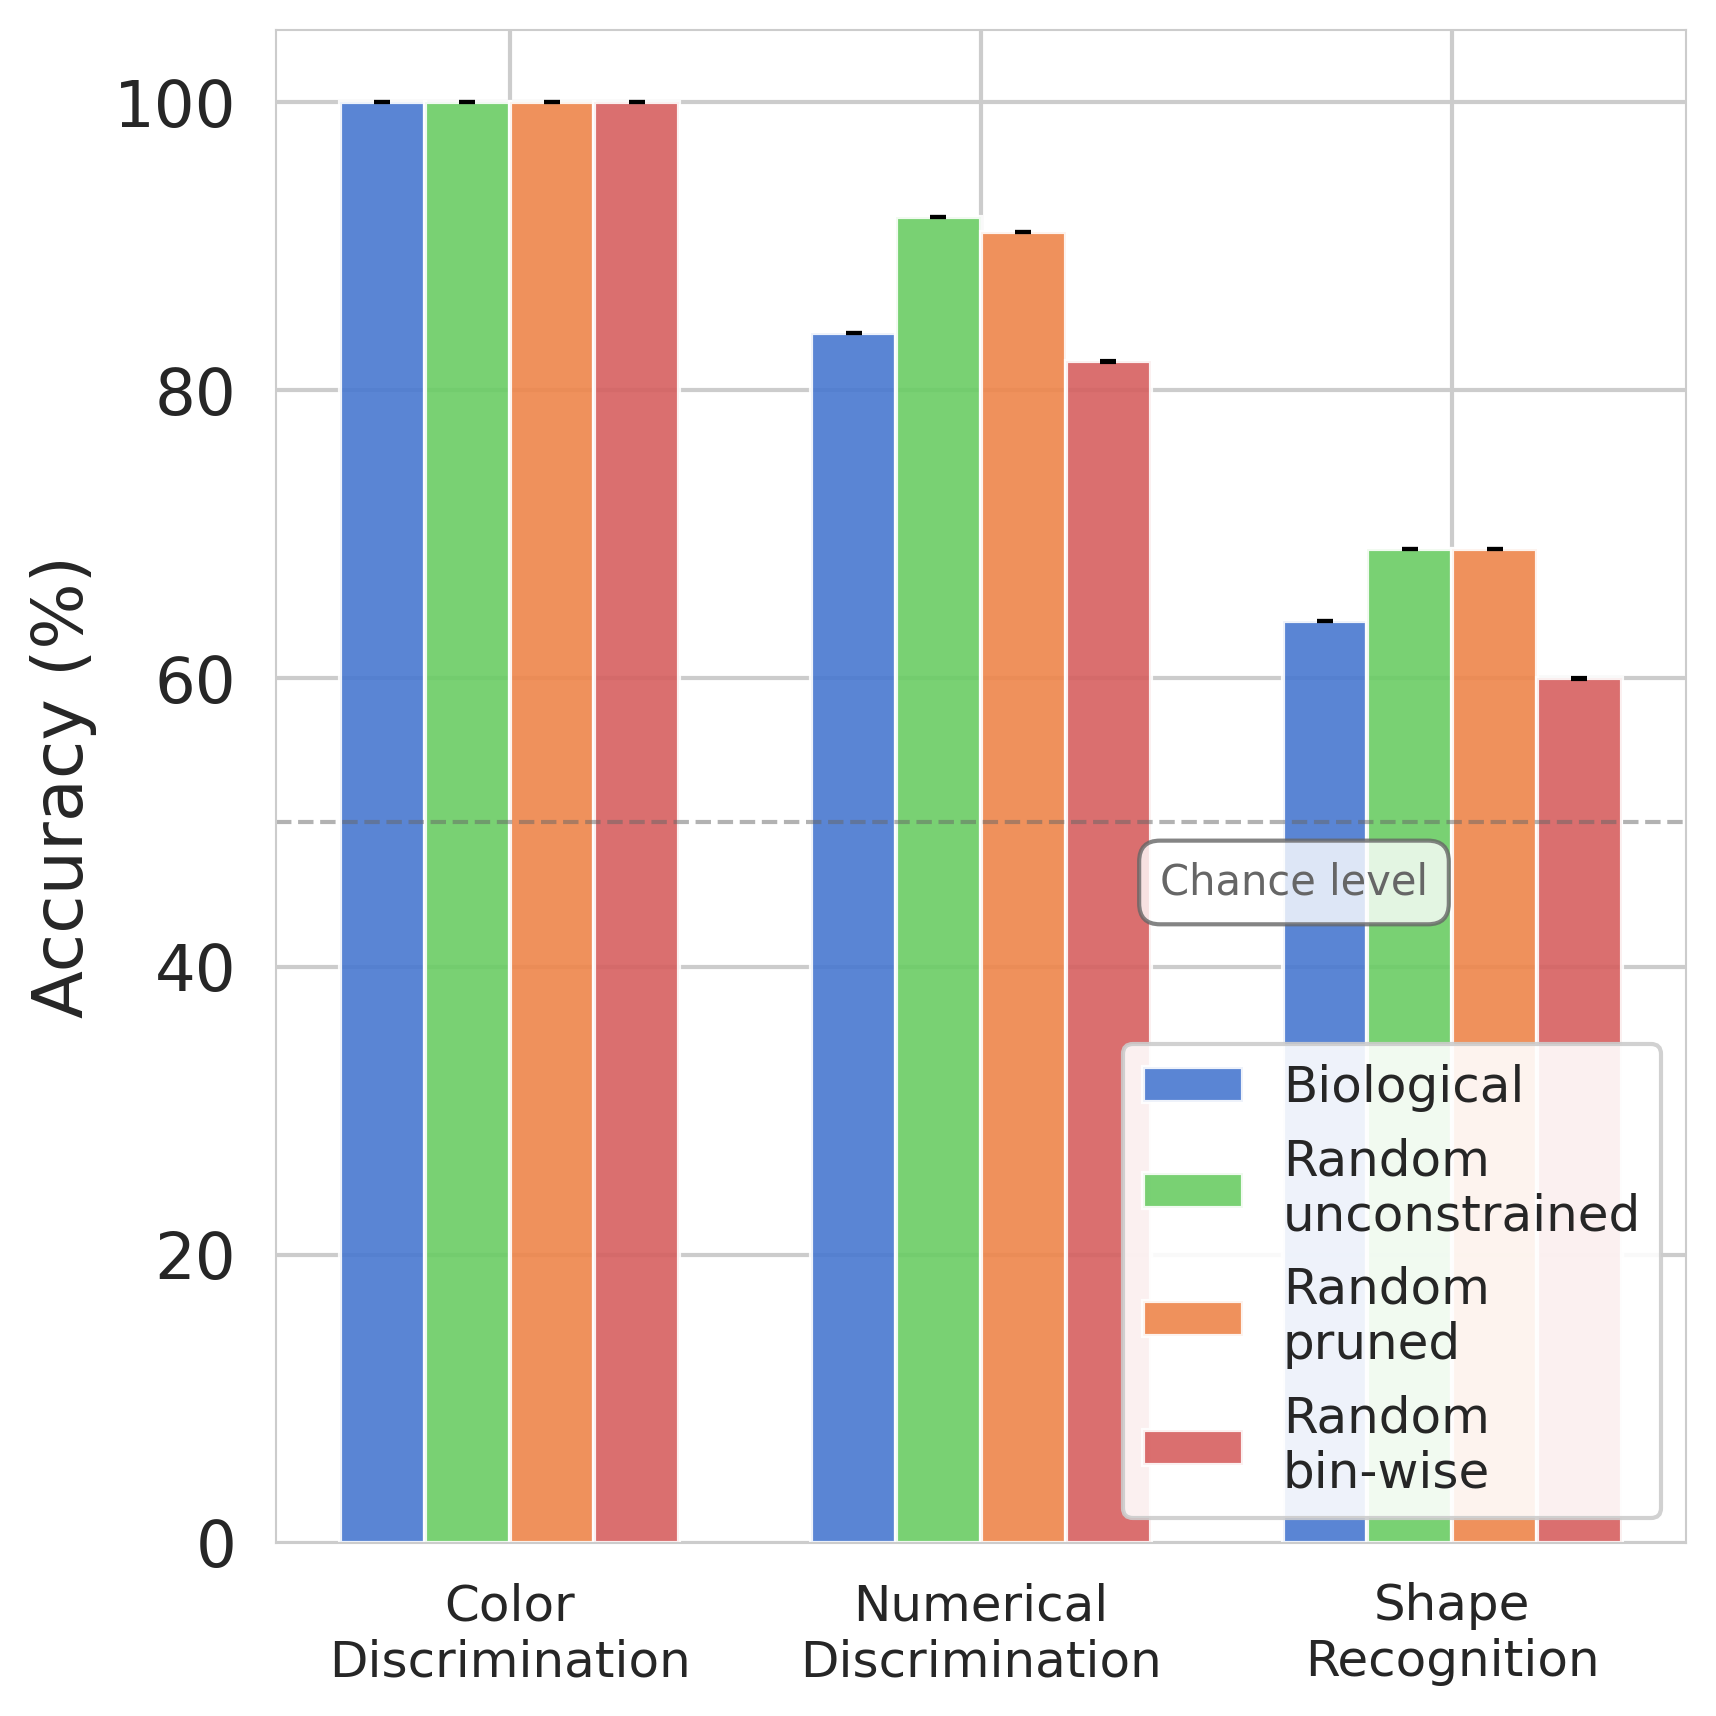

In [10]:
from notebooks.visualization.activation_plots import accuracy_comparison


figc = accuracy_comparison()

plt.savefig(os.path.join(plots_dir, "accuracy_comparison.png"), dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(os.path.join(plots_dir, "accuracy_comparison.pdf"), bbox_inches="tight") 
plt.show()

# Panel d

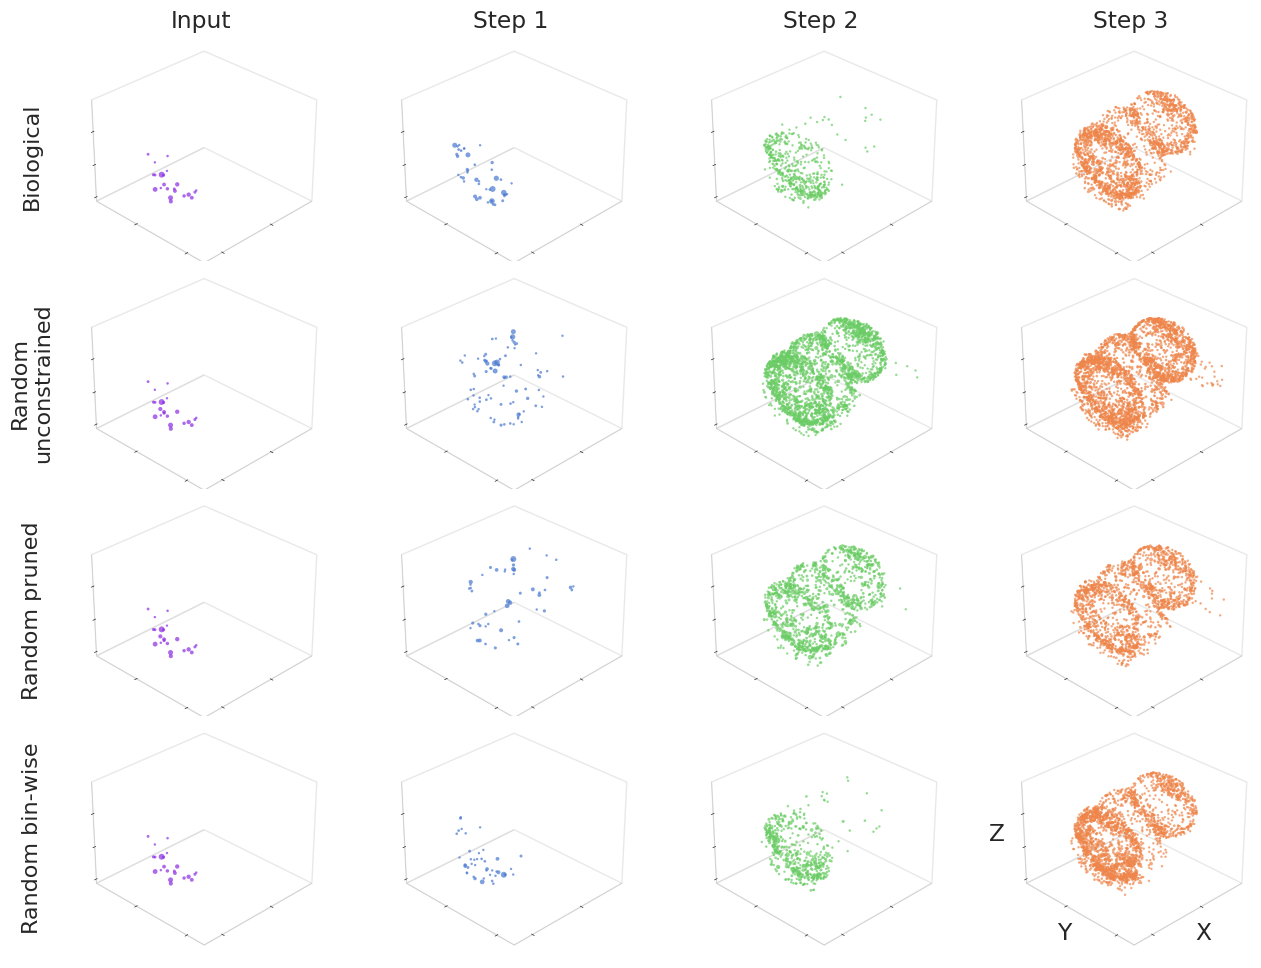

In [21]:
import importlib
from notebooks.visualization import activation_plots
importlib.reload(activation_plots)
from notebooks.visualization.activation_plots import visualize_steps_separated_compact

figd = visualize_steps_separated_compact(
    activations_dict,
    neuron_position_data,
    num_steps=3,
    max_neurons_percentage=2,
    padding_percent=5,
    figsize=(20, 12),
)

# Save figure with transparent background (Nature preference)
figd.savefig(os.path.join(plots_dir, "activation_evolution.png"), dpi=300, bbox_inches="tight", transparent=True)
figd.savefig(os.path.join(plots_dir, "activation_evolution.pdf"), bbox_inches="tight") 
plt.show()

{'Biological': [1.2516606225988294, 15.900326738716743, 65.91792036192597], 'Random unconstrained': [2.2318767728268285, 77.17137625219921, 96.73692147499192], 'Random pruned': [1.347168862877455, 39.134680980934256, 56.00086172848372], 'Random bin-wise': [1.1547161681806757, 17.541201393127714, 77.64101827582492]}


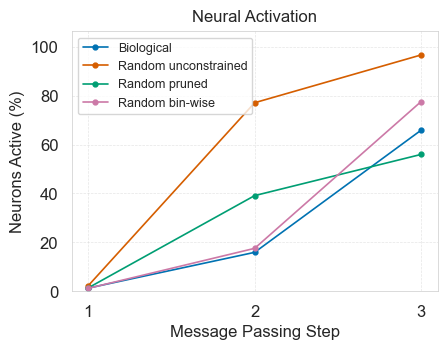

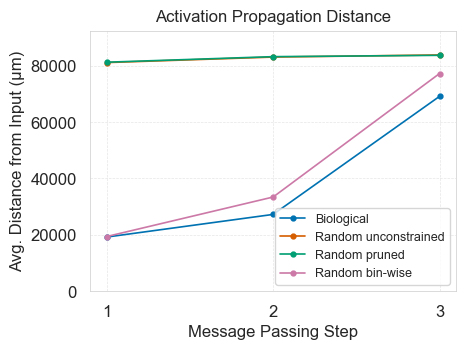

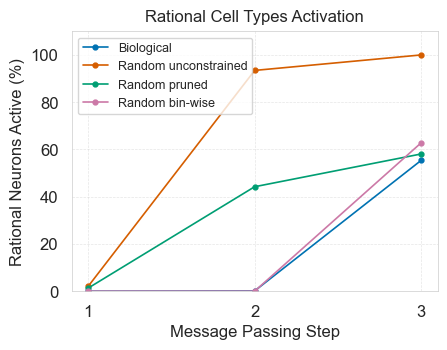

In [3]:
from notebooks.visualization.activation_plots import plot_activation_statistics

fig5, fig6, fig7 = plot_activation_statistics(activations_dict, neuron_position_data, num_steps=3)
fig5.savefig(os.path.join(plots_dir, "neuron_activation.png"), dpi=300, bbox_inches="tight")
fig5.savefig(os.path.join(plots_dir, "neuron_activation.pdf"), bbox_inches="tight")
fig6.savefig(os.path.join(plots_dir, "propagation_distance.png"), dpi=300, bbox_inches="tight")
fig6.savefig(os.path.join(plots_dir, "propagation_distance.pdf"), bbox_inches="tight")
fig7.savefig(os.path.join(plots_dir, "thinking_neuron_activation.png"), dpi=300, bbox_inches="tight")
fig7.savefig(os.path.join(plots_dir, "thinking_neuron_activation.pdf"), bbox_inches="tight")
plt.show()

# All together

/tmp/ipykernel_22029/1479221017.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


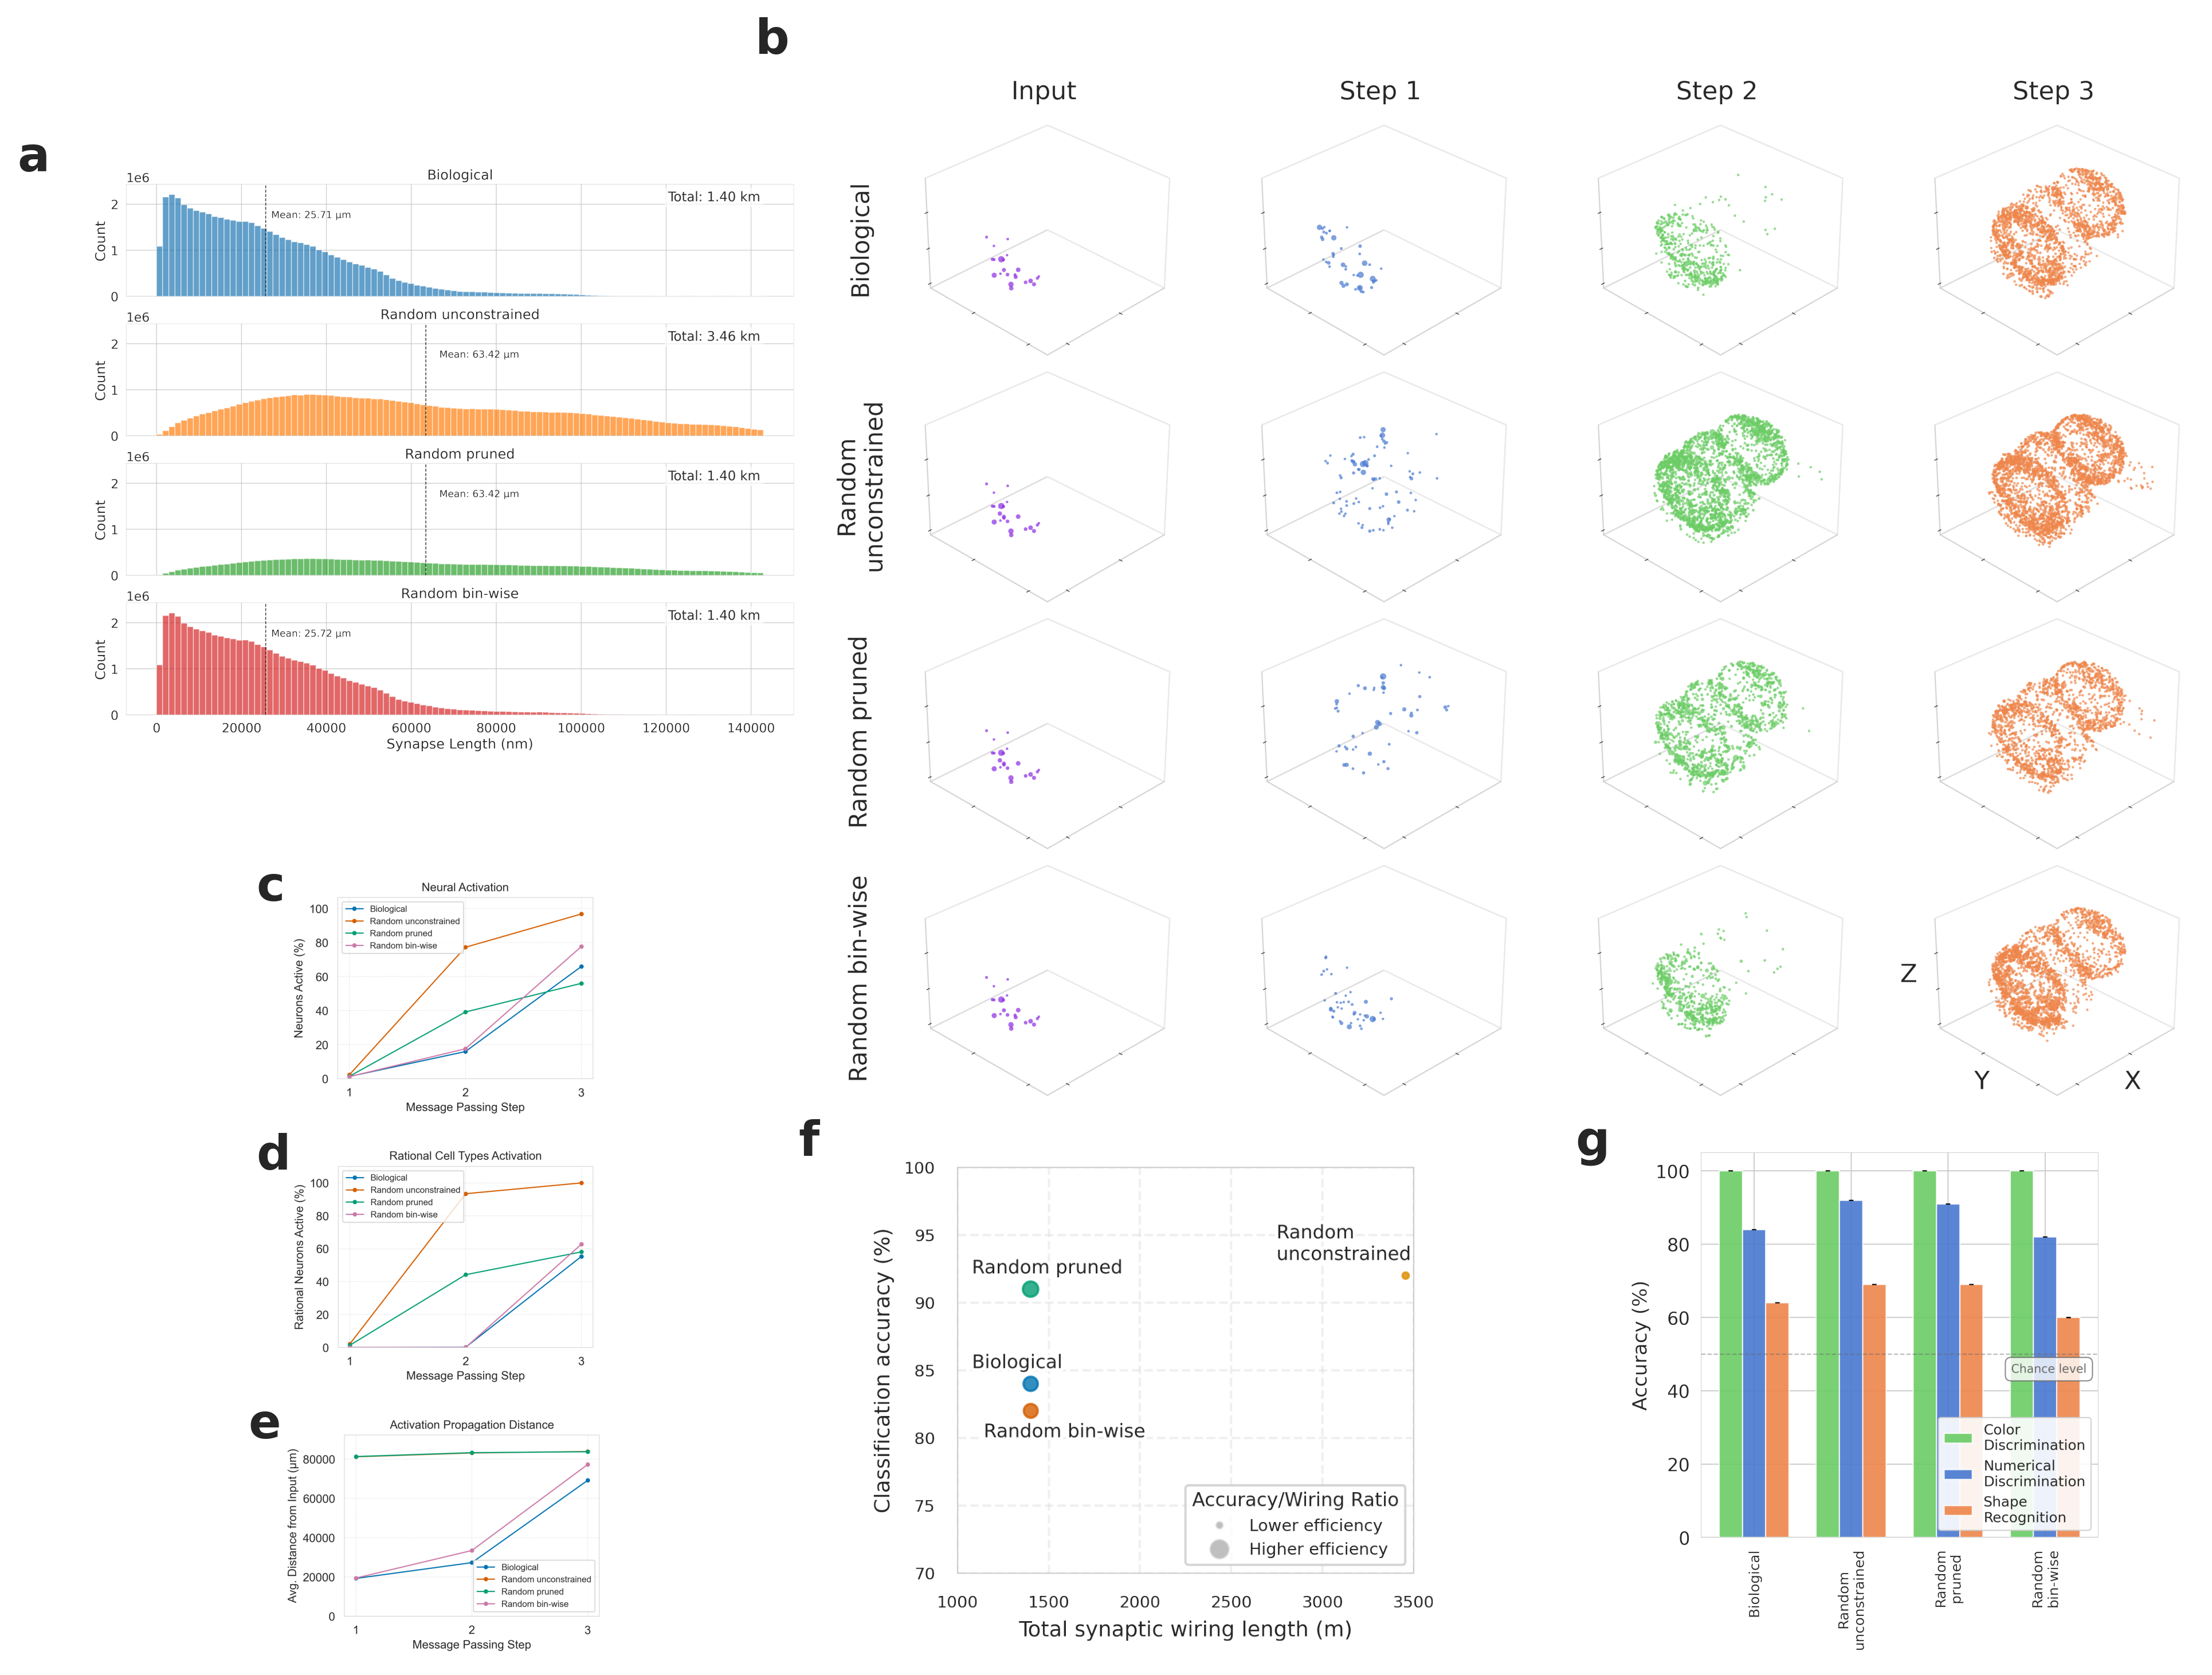

In [9]:
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Do this for each panel...

# Create the composite figure
fig = plt.figure(figsize=(16, 12), dpi=300)
gs = GridSpec(6, 6, figure=fig, wspace=0., hspace=0.1)

# Define subplot areas
ax1 = fig.add_subplot(gs[:3, :2])
ax2 = fig.add_subplot(gs[:4, 2:])
ax3 = fig.add_subplot(gs[3, :2])
ax4 = fig.add_subplot(gs[4, :2])
ax5 = fig.add_subplot(gs[5, :2])
ax6 = fig.add_subplot(gs[4:, 2:4])
ax7 = fig.add_subplot(gs[4:, 4:])

# Load the images
dir_path = os.path.join(PROJECT_ROOT, "plots")
ax1.imshow(mpimg.imread(os.path.join(dir_path, "synapse_length_distributions.png")))
ax2.imshow(mpimg.imread(os.path.join(dir_path, "activation_evolution.png")))
ax3.imshow(mpimg.imread(os.path.join(dir_path, "neuron_activation.png")))
ax4.imshow(mpimg.imread(os.path.join(dir_path, "propagation_distance.png")))
ax5.imshow(mpimg.imread(os.path.join(dir_path, "thinking_neuron_activation.png")))
ax6.imshow(mpimg.imread(os.path.join(dir_path, "accuracy_comparison.png")))
ax7.imshow(mpimg.imread(os.path.join(dir_path, "efficiency_comparison.png")))

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.axis("off")

# Add panel labels with improved positioning
label_params = {"fontsize": 20, "fontweight": "bold", "va": "top", "ha": "left"}

ax1.text(-0.1, 1.05, "a", transform=ax1.transAxes, **label_params)
ax2.text(-0.05, 1.05, "b", transform=ax2.transAxes, **label_params)
ax3.text(-0.1, 1.05, "c", transform=ax3.transAxes, **label_params)
ax4.text(-0.1, 1.05, "d", transform=ax4.transAxes, **label_params)
ax5.text(-0.1, 1.05, "e", transform=ax5.transAxes, **label_params)
ax6.text(-0.1, 1.05, "f", transform=ax6.transAxes, **label_params)
ax7.text(-0.1, 1.05, "g", transform=ax7.transAxes, **label_params)

plt.tight_layout()

# save
plt.savefig(
    os.path.join(plots_dir, "figure2_panel.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.savefig(
    os.path.join(plots_dir, "figure2_panel.pdf"), bbox_inches="tight"
)

plt.show()

In [8]:
gs[:2, :3]

GridSpec(6, 6)[0:2, 0:3]